Méthode du perceptron mutlicouche (multilayer perceptron) qui est un type de réseau neuronal artificiel où l'information ne circule que dans un seul sens.

Accuracy 1 : 0.956140350877193
Accuracy 2 : 0.9502923976608187
AUC 1 :  0.9891891891891892
AUC 2 :  0.9722972972972974


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


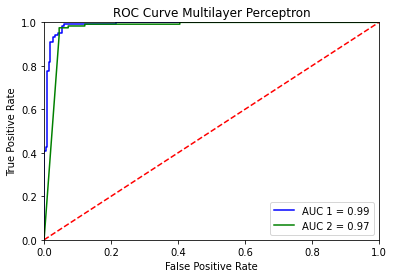

"\ndef create(row, col):\n    return [[[]for _ in range(col)]  for _ in range(row)]\n\n\nHLS=[]\nfor j in range(2,10):\n    for k in range(2,10):\n        HLS.append((j,k))\nAlpha = [10**(-k) for k in range(4,8)] #\nSolver = ['lbfgs', 'sgd','adam']\nMC = create(3*len(HLS)*len(Alpha)+1,6)\nMC[0][0]='k (nb voisins)'\nMC[0][1]='w (poids)'\nMC[0][2]='a (algorithme))'\nMC[0][3]='AUC'\nMC[0][4]='Accuracy'\nMC[0][5]='Recall'\ni=1\n\nfor k in HLS:\n    for a in Alpha:\n        for s in Solver:\n            MC[i][0]= str(k)\n            MC[i][1]= a\n            MC[i][2]= s\n\n            #algo prédiction\n            model = MLPClassifier(solver= s, alpha= a, hidden_layer_sizes= k, random_state=1)\n            model.fit(X_train,y_train)\n            prediction= model.predict(X_test)\n            y_scores = model.predict_proba(X_test)\n\n            \n            #  ROC curve\n            fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])\n            roc_auc = auc(fpr, tpr)\n            MC

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
#import matplotlib.patches as mpatches
import numpy as np
import scipy.io as sp
import pandas as pd
#from sklearn.decomposition import PCA
import xlsxwriter
from IPython.display import display
from sklearn.model_selection import StratifiedKFold



#Traitement du fichier .mat
cancercell = sp.loadmat('breastw.mat')
X = cancercell['X']
y = cancercell['y']
#print(cancercell)
y=np.reshape(y,(683,))
#Séparation des données d'apprentissage et des données tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
#fin traitement mat

#Algorithme Réseau de neurones = Perceptron multicouches

# Solver : Algorithme choisit pour entraîner le réseaux. 
#       Lbfgs = optimiseur de la famille des méthodes quasi Nexton
#       sgd = descente de gradient stochastique
#       adam = optimiseur basé sur le gradient stochastique proposé par Kingma, Diederik et Jimmy Ba
# hidden_layer_sizes : nombre de couches cachées et le nombre de neurones par couche cachée
# Alpha : pas,vitesse avec laquelle l'algo va apprendre, Plus il sera petit, plus le réseau va prendre du temps pour converger vers la solution.
# Random_state : état aléatoire d'initialisation du réseau.

#Modèle1
mlp1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8, 2), random_state=1)
mlp1.fit(X_train, y_train)
prediction1 = mlp1.predict(X_test)

#Modèle2
mlp2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(9, 2), random_state=1) #modif du nombre de couches cachées par ex ici 9
mlp2.fit(X_train, y_train)
prediction2 = mlp2.predict(X_test)

#Accuracy
result1 = accuracy_score(y_test,prediction1)
print("Accuracy 1 :",result1)

result2 = accuracy_score(y_test,prediction2)
print("Accuracy 2 :",result2)

#ROC curve
#Modèle 1 et 2 
y_scores1 = mlp1.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores1[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC 1 : ", roc_auc)

y_scores2 = mlp2.predict_proba(X_test)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_scores2[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("AUC 2 : ", roc_auc2)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC 1 = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'g', label = 'AUC 2 = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Multilayer Perceptron')
plt.show()

"""
def create(row, col):
    return [[[]for _ in range(col)]  for _ in range(row)]


HLS=[]
for j in range(2,10):
    for k in range(2,10):
        HLS.append((j,k))
Alpha = [10**(-k) for k in range(4,8)] #
Solver = ['lbfgs', 'sgd','adam']
MC = create(3*len(HLS)*len(Alpha)+1,6)
MC[0][0]='k (nb voisins)'
MC[0][1]='w (poids)'
MC[0][2]='a (algorithme))'
MC[0][3]='AUC'
MC[0][4]='Accuracy'
MC[0][5]='Recall'
i=1

for k in HLS:
    for a in Alpha:
        for s in Solver:
            MC[i][0]= str(k)
            MC[i][1]= a
            MC[i][2]= s

            #algo prédiction
            model = MLPClassifier(solver= s, alpha= a, hidden_layer_sizes= k, random_state=1)
            model.fit(X_train,y_train)
            prediction= model.predict(X_test)
            y_scores = model.predict_proba(X_test)

            
            #  ROC curve
            fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
            roc_auc = auc(fpr, tpr)
            MC[i][3]=(round(roc_auc, 3))

            #Accuracy
            acc = accuracy_score(y_test,prediction)
            MC[i][4] = (round(acc,3))
            
            #Recall
            recc = recall_score(y_test,prediction)
            MC[i][5] = (round(recc,3))
            
            i += 1 

print(MC)
workbook = xlsxwriter.Workbook('Comparaison matrice Perceptron Multicouches.xlsx')
worksheet = workbook.add_worksheet()
col = 0
for row, data in enumerate(MC):
    worksheet.write_row(row, col, data)
workbook.close()
"""


DATA FRAME

In [5]:
HLS=[]
for j in range(2,15):
    for k in range(2,15):
        HLS.append((j,k))
Alpha = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
Solver = ['lbfgs', 'sgd','adam']
Activation = ['identity', 'logistic', 'tanh', 'relu']
Max_iter = []
for k in range(1,10):
    Max_iter.append(2*k)
    
data = np.array([['Hidden_layers','Alpha','solver','Activation','Max_iter','F1 score','recall','precision','accuracy','AUC',]])    
skf = StratifiedKFold(n_splits=10,shuffle=True) # équilibrage dataset

for train_index, test_index in skf.split(X,y):
    
    test =False
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    y_train=np.ravel(y_train)
    y_test=np.ravel(y_test)

    #Méthode MLP

    test =False
    
    for k in HLS :
        for i in Alpha :
            for j in Solver :
                for p in Activation : 
                    for n in Max_iter :
                        
                        #algo MLP
                        model_MLP = MLPClassifier(hidden_layer_sizes = k, alpha = i, solver = j, activation = p, max_iter = n)
                        model_MLP.fit(X_train,y_train)
                        y_pred_MLP = model_MLP.predict(X_test)
                        
                        #fin algo MLP
                    
                        y_pred_MLP = model_MLP.predict(X_test)
                        y_pred_MLP = y_pred_MLP[:, 1]
                    
                        
                        F1_MLP = round(f1_score(y_test,y_pred_MLP),3)
                        recall_MLP = round(recall_score(y_test,y_pred_MLP),3)
                        precision_MLP = round(precision_score(y_test,y_pred_MLP,zero_division=0),3)
                        accuracy_MLP = round(accuracy_score(y_test,y_pred_MLP),3)
                        AUC_MLP = round(roc_auc_score(y_test, y_pred_MLP),3)

                        data = np.append(data, [[k,i,j,p,n,F1_MLP,recall_MLP,precision_MLP,accuracy_MLP,AUC_MLP]],axis=0)
                        
                        #Fin méthode MLP



df = pd.DataFrame(data, columns=['Hidden_layers','Alpha','solver','Activation','Max_iter','F1 score','recall','precision','accuracy','AUC'])
df=df.drop(df.index[0])
df

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed